<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Defining list of sales

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
# Writing needed functions

def mean(values):
  return sum(values) / len(values)

def variance(values):
  mu = mean(values)
  dev = [(x-mu)**2 for x in values]
  return sum(dev)/(len(dev) - 1)

def stdev(values):
  var = variance(values)
  return var ** 0.5

In [50]:
print('Mean of sales:')
mean(sales)

Mean of sales:


3052.714285714286

In [51]:
print('Variance of sales:')
variance(sales)

Variance of sales:


214387.90476190473

In [52]:
print('Standard deviation of sales:')
std_sales = stdev(sales)
std_sales

Standard deviation of sales:


463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Creating customers list

customers = [127, 80, 105, 92, 120, 115, 93]

In [54]:
# Combining sales and customers data with dict
sales_data = {'sales': sales, 'customers': customers}

# Creating and showing dataframe
sales_df = pd.DataFrame(sales_data)
sales_df

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [55]:
# Covariances between sales and number of customers that entered the store

cov = sales_df.cov()
cov

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


In [0]:
sales_df.cov??

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [56]:
# Standard deviation of customers
stdev(customers)

17.057326313123664

In [57]:
corr = cov.loc['sales', 'customers'] / ((stdev(sales) * stdev(customers)))
corr

0.9628339778148909

In [58]:
sales_df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [59]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [60]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [61]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

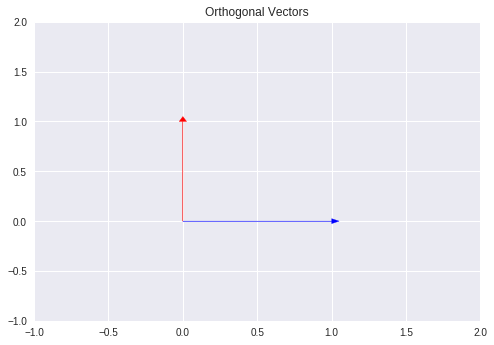

In [65]:
# The synonym for orthogonal is perpendicular

v_1 = [0, 1]
v_2 = [1, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, v_1[0], v_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [66]:
# These vectors are not orthogonal because their dot product does not equal zero

a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [73]:
# Norm of c squared
np.linalg.norm(c) ** 2

665.0

In [74]:
# Dot product of c and c
np.dot(c, c)

665

In [76]:
# The transpose of c times c
c.T * c

array([  4, 225,  36, 400])

In [0]:
# All these quantities have the number '665' in common
# The array you get from the c.T * c calculation sums to 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0\\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [77]:
# Turning f into a unit vector
f = [4, 12, 11, 9, 2]

norm = np.linalg.norm(f)

unit_vector = f / norm
unit_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [78]:
# Checking work -- norm is now 1
np.linalg.norm(unit_vector)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

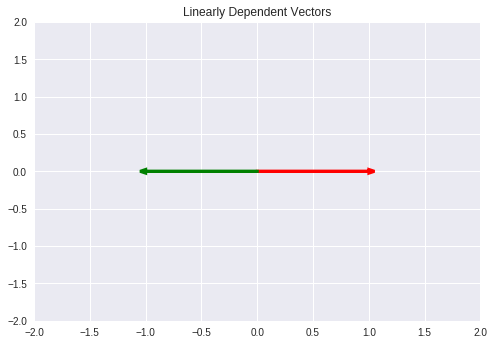

In [80]:
# Linearly Dependent

plt.xlim(-2,2)          
plt.ylim(-2,2)

v = [1,0] 
v2 = np.multiply(-1, v)

plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
plt.show()

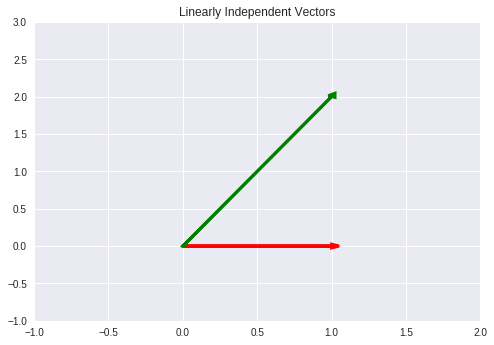

In [83]:
# Linearly Independent

plt.xlim(-1,2)          
plt.ylim(-1,3)

v = [1,0] 
v2 = [1, 2]

plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [92]:
M = np.array([[1, 4],
              [2, 8]])

np.linalg.det(M)

# The determinant of the matrix of these vectors is zero because these vectors are
# linearly dependent. This means the span is R -- one dimensional space

0.0

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [113]:
M2 = np.array([[1, -1, 4],
               [2, 0, 8],
               [3, 7, 2]])

np.linalg.det(M2)

# The determinant of the matrix of these vectors is -20, because these which means
# these vectors are independent. This means the span is R^3 -- three dimensional space.

-20.000000000000007

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



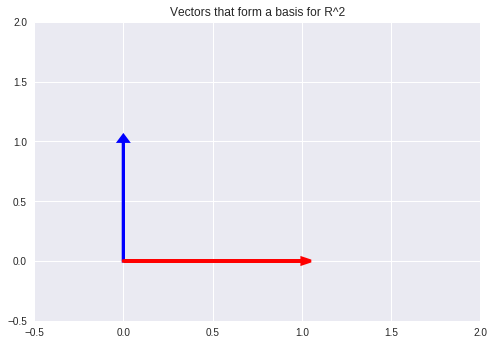

In [98]:
plt.xlim(-.5,2)          
plt.ylim(-.5,2)

# Original Vector
b1 = [0, 1] 
b2 = [1, 0]

# Plot Vectors
plt.arrow(0,0, b1[0], b1[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b2[0], b2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Vectors that form a basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is formed by a set of linearly independent vectors. Linear combinations of these vectors can span the entire space of R^2

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

#### Adding first row to the second row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

#### Subtracting 4 times the first row from the second row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -12
\end{bmatrix}
\end{align}

#### Dividing second row by 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -12
\end{bmatrix}
\end{align}

I believe the rank is 2.

## 7.2 What does the rank of a matrix tell us?

The rank tells us the actual dimensionality of the matrix. Even though the above matrix was 3x3, it had a row that was linearly dependent to another row. We see this because we have two rows that lead with 1 and have 0's underneath.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = [1, 3] 
w = [-1, 2]

frac = np.dot(w, v) / np.dot(v, v)
proj = np.multiply(v, frac)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


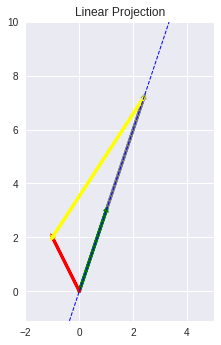

In [115]:
# Axis Bounds
plt.xlim(-2, 5)          
plt.ylim(-1.1, 10)

# Original Vectors
v = [1, 3] 
w = [-1, 2]
proj = np.multiply(2.4,v)
x_minus_proj = w-proj

# Set axes -- make equal
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L -- change slope of line with coeff before 'x_vals'
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Linear Projection")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

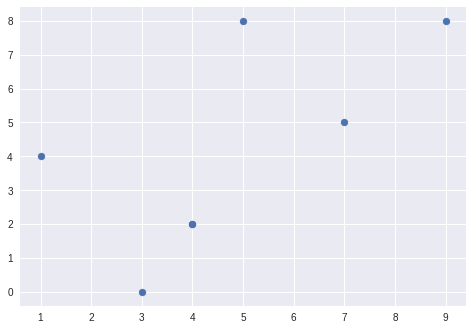

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()